In [1]:
from LOTUS_regression.regression import mzm_regression
from LOTUS_regression.predictors import load_data
from LOTUS_regression.predictors.seasonal import add_seasonal_components
import LOTUS_regression.tests as tests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from scipy import stats

In [9]:
predictors = load_data('pred_baseline_ilt.csv')
print(list(predictors))

predictors2 = load_data('pred_baseline_pwlt.csv')
print(list(predictors2))
predictors.loc['1980-01-01':'1981-01-01']

['enso', 'trop', 'solar', 'qboA', 'qboB', 'aod', 'linear_pre', 'linear_post', 'pre_const', 'post_const', 'gap_cons']
['enso', 'trop', 'solar', 'qboA', 'qboB', 'aod', 'linear_pre', 'linear_post', 'constant']


,enso,trop,solar,qboA,qboB,aod,linear_pre,linear_post,pre_const,post_const,gap_cons
time,,,,,,,,,,,
1980-01-01,0.593560,0.153408,1.552585,1.215934,0.804323,-0.406988,-1.700240,0.0,1.0,0.0,0.0
1980-02-01,0.505750,-0.215462,1.461317,1.131103,0.670427,-0.424788,-1.691753,0.0,1.0,0.0,0.0
1980-03-01,0.610718,-0.936023,0.877697,1.200868,0.488990,-0.442955,-1.683813,0.0,1.0,0.0,0.0
1980-04-01,0.850934,-1.385269,1.752787,1.312802,0.233795,-0.455984,-1.675325,0.0,1.0,0.0,0.0
1980-05-01,0.890297,-0.737189,2.155682,1.342337,-0.176324,-0.468646,-1.667112,0.0,1.0,0.0,0.0
1980-06-01,0.854971,-0.774968,1.547603,1.131315,-0.882360,-0.464059,-1.658624,0.0,1.0,0.0,0.0
1980-07-01,0.671277,0.096229,1.373898,0.861266,-1.074006,-0.442588,-1.650410,0.0,1.0,0.0,0.0
1980-08-01,0.254433,0.932763,0.955150,0.736625,-1.153226,-0.420751,-1.641923,0.0,1.0,0.0,0.0
1980-09-01,0.198921,0.789450,1.271759,0.561992,-1.138313,-0.411392,-1.633435,0.0,1.0,0.0,0.0


In [54]:
#uccle =   pd.read_csv('/Volumes/HD3/KMI/MLR_Uccle/Files/1km_monthlymean_all.csv')
uccle =   pd.read_csv('/home/poyraden/MLR_Uccle/Files/1km_monthlymean_all_relative.csv')
#uccle =   pd.read_csv('/Volumes/HD3/KMI/MLR_Uccle/Files/1km_monthlymean_all_relative.csv')


#uccle_des['date'] =  pd.to_datetime(uccle_des['date'],
                             # format='%Y-%m')
#uccle_des.set_index('date', inplace=True)
uccle[0:5]

,date,0km,1km,2km,3km,4km,5km,6km,7km,8km,...,26km_ds,27km_ds,28km_ds,29km_ds,30km_ds,31km_ds,32km_ds,33km_ds,34km_ds,35km_ds
0,1969-01-01,2.912,2.989,3.170,3.050,2.810,2.582,2.356,1.948,1.794,...,0.176023,0.150776,0.143983,0.164397,0.279994,0.490394,0.616999,0.726390,0.684176,NaN
1,1969-02-01,2.508,1.944,1.801,1.997,2.016,1.823,2.131,2.838,4.030,...,0.134114,0.164925,0.228390,0.269485,0.244483,0.311861,0.397392,0.462365,0.463972,0.441237
2,1969-03-01,1.832,2.352,3.002,3.077,2.906,2.517,2.097,1.852,1.843,...,-0.006758,-0.002138,-0.035659,-0.016093,0.018245,0.051473,0.096090,0.156548,0.142154,0.249384
3,1969-04-01,2.000,3.164,3.738,3.569,3.055,2.574,2.121,1.859,1.617,...,0.012754,0.016034,0.031780,0.041640,0.068683,0.043845,0.035349,0.064540,0.088078,0.100840
4,1969-05-01,1.378,2.449,3.464,3.617,3.473,3.258,2.857,2.779,3.667,...,0.013661,0.030910,0.054326,0.065788,0.077930,0.091798,0.147521,0.177979,0.242554,0.211965


In [6]:
uccle['date'] =  pd.to_datetime(uccle['date'], format='%Y-%m')
uccle.set_index('date', inplace=True)
uccle[0:5]

,0km,1km,2km,3km,4km,5km,6km,7km,8km,9km,...,26km_ds,27km_ds,28km_ds,29km_ds,30km_ds,31km_ds,32km_ds,33km_ds,34km_ds,35km_ds
date,,,,,,,,,,,,,,,,,,,,,
1969-01-01,2.912,2.989,3.170,3.050,2.810,2.582,2.356,1.948,1.794,2.618,...,0.176023,0.150776,0.143983,0.164397,0.279994,0.490394,0.616999,0.726390,0.684176,NaN
1969-02-01,2.508,1.944,1.801,1.997,2.016,1.823,2.131,2.838,4.030,5.592,...,0.134114,0.164925,0.228390,0.269485,0.244483,0.311861,0.397392,0.462365,0.463972,0.441237
1969-03-01,1.832,2.352,3.002,3.077,2.906,2.517,2.097,1.852,1.843,2.819,...,-0.006758,-0.002138,-0.035659,-0.016093,0.018245,0.051473,0.096090,0.156548,0.142154,0.249384
1969-04-01,2.000,3.164,3.738,3.569,3.055,2.574,2.121,1.859,1.617,1.599,...,0.012754,0.016034,0.031780,0.041640,0.068683,0.043845,0.035349,0.064540,0.088078,0.100840
1969-05-01,1.378,2.449,3.464,3.617,3.473,3.258,2.857,2.779,3.667,5.461,...,0.013661,0.030910,0.054326,0.065788,0.077930,0.091798,0.147521,0.177979,0.242554,0.211965


In [17]:
uccle_time = uccle.loc['1977-02-01':'2017-06-01']
#uccle_time['5km'][uccle['5km']>0]

In [18]:
predictors, uccle_time = pd.DataFrame.align(predictors, uccle_time, axis=0)

# (nsamples, npredictors) matrix
X = predictors.values
print('X', len(X))

# (nsamples) array of observations
Y = uccle_time['5km_ds'].values
print('Y',len(Y))

regression_output = mzm_regression(X, Y)

X 485
Y 485


['0km',
 '1km',
 '2km',
 '3km',
 '4km',
 '5km',
 '6km',
 '7km',
 '8km',
 '9km',
 '10km',
 '11km',
 '12km',
 '13km',
 '14km',
 '15km',
 '16km',
 '17km',
 '18km',
 '19km',
 '20km',
 '21km',
 '22km',
 '23km',
 '24km',
 '25km',
 '26km',
 '27km',
 '28km',
 '29km',
 '30km',
 '31km',
 '32km',
 '33km',
 '34km',
 '35km',
 '0km_ds',
 '1km_ds',
 '2km_ds',
 '3km_ds',
 '4km_ds',
 '5km_ds',
 '6km_ds',
 '7km_ds',
 '8km_ds',
 '9km_ds',
 '10km_ds',
 '11km_ds',
 '12km_ds',
 '13km_ds',
 '14km_ds',
 '15km_ds',
 '16km_ds',
 '17km_ds',
 '18km_ds',
 '19km_ds',
 '20km_ds',
 '21km_ds',
 '22km_ds',
 '23km_ds',
 '24km_ds',
 '25km_ds',
 '26km_ds',
 '27km_ds',
 '28km_ds',
 '29km_ds',
 '30km_ds',
 '31km_ds',
 '32km_ds',
 '33km_ds',
 '34km_ds',
 '35km_ds']

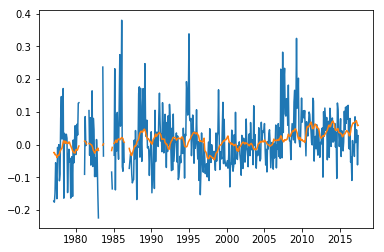

In [29]:
plt.plot(uccle_time.index, uccle_time['5km_ds'])
plt.plot(uccle_time.index, regression_output['fit_values'])
uccle_time['5km_ds']
list(uccle_time)

In [20]:
param_list = dict(zip(list(predictors), regression_output['gls_results'].params))
param_list

{'enso': -0.010884488899822652,
 'trop': 0.0014417828531951425,
 'solar': 0.0044470640744785732,
 'qboA': -0.0025114307747941336,
 'qboB': -0.0091102697751629692,
 'aod': 0.00035418241030885523,
 'linear_pre': 0.021311273766189048,
 'linear_post': 0.043528729096425453,
 'pre_const': 0.029710383563763487,
 'post_const': -0.010186135156449509,
 'gap_cons': -0.013636351583731927}

In [21]:
print(list(predictors))

['enso', 'trop', 'solar', 'qboA', 'qboB', 'aod', 'linear_pre', 'linear_post', 'pre_const', 'post_const', 'gap_cons']


In [22]:
predictors2, uccle_time = pd.DataFrame.align(predictors2, uccle_time, axis=0)

# (nsamples, npredictors) matrix
X2 = predictors2.values
print('X', len(X))

# (nsamples) array of observations
Y2 = uccle_time['5km_ds'].values
print('Y',len(Y))

regression_output2 = mzm_regression(X2, Y2)

X 485
Y 485


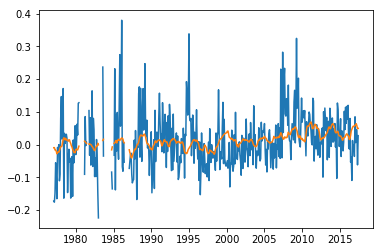

In [23]:
plt.plot(uccle_time.index, uccle_time['5km_ds'])
plt.plot(uccle_time.index, regression_output2['fit_values'])

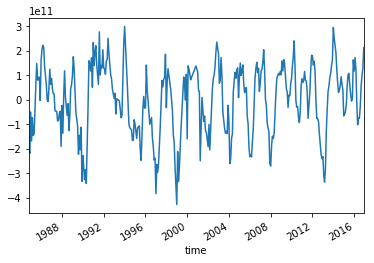

In [2]:
s2_omps_osiris = tests.load_example_data('S2_OSIRIS_OMPS_alt_nd_sample.csv')


plt.figure()
#s2_omps_osiris['relative_anomaly'].plot()
s2_omps_osiris['anomaly'].plot()



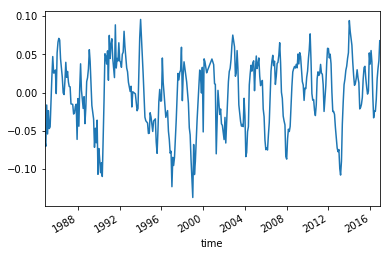

In [4]:
s2_omps_osiris['relative_anomaly'].plot()


In [41]:
predictors2, s2_omps_osiris = pd.DataFrame.align(predictors2, s2_omps_osiris, axis=0)

# (nsamples, npredictors) matrix
X2 = predictors.values

# (nsamples) array of observations
Y2 = s2_omps_osiris['relative_anomaly'].values

In [5]:
predictors, s2_omps_osiris = pd.DataFrame.align(predictors, s2_omps_osiris, axis=0)

# (nsamples, npredictors) matrix
X2 = predictors.values

# (nsamples) array of observations
Y2 = s2_omps_osiris['relative_anomaly'].values

NameError: name 'predictors' is not defined

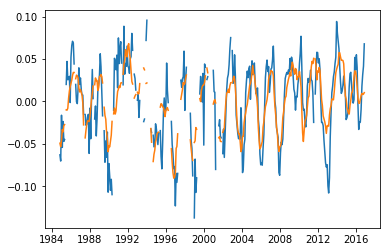

In [42]:
regression_output2 = mzm_regression(X2, Y2)

plt.figure()
plt.plot(s2_omps_osiris.index, Y2)

plt.plot(s2_omps_osiris.index, regression_output2['fit_values'])

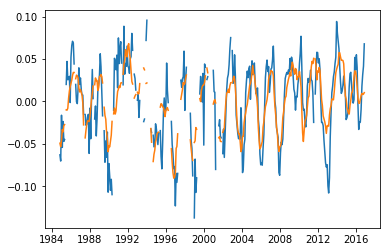

In [43]:
predictors, s2_omps_osiris = pd.DataFrame.align(predictors, s2_omps_osiris, axis=0)

# (nsamples, npredictors) matrix
X = predictors.values

# (nsamples) array of observations
Y = s2_omps_osiris['relative_anomaly'].values

regression_output = mzm_regression(X, Y)

plt.figure()
plt.plot(s2_omps_osiris.index, Y)

plt.plot(s2_omps_osiris.index, regression_output['fit_values'])

In [28]:
regression_output['gls_results'].params['linear_pre']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [51]:
rel =   pd.read_csv('/home/poyraden/MLR_Uccle/Files/1km_monthlymean_reltropop.csv')
rel

,Unnamed: 0,24km,23km,22km,21km,20km,19km,18km,17km,16km,...,-2km,-3km,-4km,-5km,-6km,-7km,-8km,-9km,-10km,-11km
0,1969-01-01,-9999.000,5.005,6.053,6.799,6.551,7.223,8.433,9.694,12.017,...,1.776,1.924,2.356,2.428,2.884,3.140,3.532,2.387,2.134,2.917
1,1969-02-01,5.257,6.002,6.479,7.643,8.743,9.956,11.422,12.883,14.051,...,1.722,1.505,1.653,1.687,1.897,2.007,1.973,2.214,-9999.000,-9999.000
2,1969-03-01,4.784,5.204,5.353,5.967,6.519,7.248,8.150,9.389,10.486,...,1.758,1.881,2.162,2.594,2.866,2.942,2.652,2.232,2.181,1.747
3,1969-04-01,4.919,5.353,5.528,6.523,7.138,7.978,8.843,9.835,10.541,...,1.526,1.688,1.886,2.256,2.674,3.178,3.449,3.185,2.728,3.570
4,1969-05-01,5.924,6.760,7.329,8.124,8.741,9.582,10.298,10.903,11.258,...,2.293,2.392,2.835,3.155,3.373,3.435,3.098,2.622,2.921,3.268
5,1969-06-01,5.844,6.234,6.986,7.973,8.841,9.609,10.390,11.127,11.453,...,2.238,2.240,2.581,2.821,3.313,3.427,3.663,3.526,2.755,2.061
6,1969-07-01,4.014,4.708,5.506,6.472,7.087,7.885,9.033,9.920,10.704,...,2.097,2.275,2.292,2.565,2.670,2.649,2.793,3.500,4.055,4.120
7,1969-08-01,4.470,5.150,6.239,7.038,7.664,8.654,9.859,10.856,11.469,...,1.699,1.835,2.131,2.451,2.902,3.070,3.260,3.216,3.878,3.556
8,1969-09-01,3.645,4.218,4.544,5.181,5.873,6.623,7.458,8.669,9.972,...,1.500,1.703,1.951,2.536,2.826,3.188,3.609,3.905,3.513,2.669
9,1969-10-01,3.564,3.878,4.402,4.734,5.351,5.839,6.422,7.288,8.244,...,1.406,1.409,1.429,1.756,2.039,2.255,2.539,2.744,2.780,2.483


In [49]:
print(rel["-10km"][0:10], uccle['0km'][0:10])

0       2.134
1   -9999.000
2       2.181
3       2.728
4       2.921
5       2.755
6       4.055
7       3.878
8       3.513
9       2.780
Name: -10km, dtype: float64 date
1969-01-01       2.912
1969-02-01       2.508
1969-03-01       1.832
1969-04-01       2.000
1969-05-01       1.378
1969-06-01       1.661
1969-07-01       1.949
1969-08-01       2.118
1969-09-01   -9999.000
1969-10-01   -9999.000
Name: 0km, dtype: float64


In [10]:
pre =   pd.read_csv('/home/poyraden/MLR_Uccle/Files/1km_monthlymean_reltropop_relative.csv')
pre[['date','24km_ds']]

pre['date'] = pd.to_datetime(pre['date'], format='%Y-%m')

a = pre[(pre.date == pd.Timestamp('2017-10-01'))]['-2km_ds'].tolist()

print(np.isnan(a))
pre.loc[0]['date']

[ True]


Timestamp('1969-01-01 00:00:00')

In [13]:
if(pd.Timestamp('1969-01-01 00:00:00') == pd.Timestamp('1969-01-01 00:00:00') ):print('ee')

ee


In [22]:
pre[pre.date == pd.Timestamp('1969-01-01 00:00:00')]
#[['24km', '20km','24km_ds']]


,date,24km,23km,22km,21km,20km,19km,18km,17km,16km,...,-2km_ds,-3km_ds,-4km_ds,-5km_ds,-6km_ds,-7km_ds,-8km_ds,-9km_ds,-10km_ds,-11km_ds
0,1969-01-01,-9999.0,5.005,6.053,6.799,6.551,7.223,8.433,9.694,12.017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
kom =   pd.read_csv('/home/poyraden/MLR_Uccle/Files/1km_monthlymean_all_relative.csv')


In [24]:
kom

,date,0km,1km,2km,3km,4km,5km,6km,7km,8km,...,26km_ds,27km_ds,28km_ds,29km_ds,30km_ds,31km_ds,32km_ds,33km_ds,34km_ds,35km_ds
0,1969-01-01,2.912,2.989,3.170,3.050,2.810,2.582,2.356,1.948,1.794,...,0.176023,0.150776,0.143983,0.164397,0.279994,0.490394,0.616999,0.726390,0.684176,NaN
1,1969-02-01,2.508,1.944,1.801,1.997,2.016,1.823,2.131,2.838,4.030,...,0.134114,0.164925,0.228390,0.269485,0.244483,0.311861,0.397392,0.462365,0.463972,0.441237
2,1969-03-01,1.832,2.352,3.002,3.077,2.906,2.517,2.097,1.852,1.843,...,-0.006758,-0.002138,-0.035659,-0.016093,0.018245,0.051473,0.096090,0.156548,0.142154,0.249384
3,1969-04-01,2.000,3.164,3.738,3.569,3.055,2.574,2.121,1.859,1.617,...,0.012754,0.016034,0.031780,0.041640,0.068683,0.043845,0.035349,0.064540,0.088078,0.100840
4,1969-05-01,1.378,2.449,3.464,3.617,3.473,3.258,2.857,2.779,3.667,...,0.013661,0.030910,0.054326,0.065788,0.077930,0.091798,0.147521,0.177979,0.242554,0.211965
5,1969-06-01,1.661,2.390,3.583,3.797,3.603,3.339,2.984,2.477,2.609,...,-0.002149,0.003326,0.051234,0.078168,0.113462,0.133000,0.141586,0.193327,0.186884,0.247376
6,1969-07-01,1.949,3.318,4.003,3.954,3.261,3.229,2.818,2.855,3.273,...,0.040038,0.024378,0.023267,-0.015241,-0.000063,-0.002592,-0.012202,0.007112,0.024068,0.026530
7,1969-08-01,2.118,3.415,3.730,3.356,3.114,2.910,2.898,2.173,2.051,...,0.064424,0.052921,0.027406,0.031864,0.059729,0.083590,0.129085,0.155546,0.146483,0.135923
8,1969-09-01,-9999.000,3.735,3.701,3.793,3.482,3.193,2.807,2.298,2.019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1969-10-01,-9999.000,2.760,2.383,2.861,2.782,2.398,2.005,1.724,1.480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
rel =   pd.read_csv('/home/poyraden/MLR_Uccle/Files/1km_monthlymean_reltropop_deas_relative.csv')

list(rel)
rel

,date,24km_ds,23km_ds,22km_ds,21km_ds,20km_ds,19km_ds,18km_ds,17km_ds,16km_ds,...,-2km_ds,-3km_ds,-4km_ds,-5km_ds,-6km_ds,-7km_ds,-8km_ds,-9km_ds,-10km_ds,-11km_ds
0,1969-02-01,0.234739,0.295489,0.278459,0.365407,0.385976,0.421651,0.438863,0.429464,0.363555,...,-0.180447,-0.301563,-0.293891,-0.354166,-0.337230,-0.352028,-0.398036,-0.342478,NaN,NaN
1,1969-03-01,0.044797,0.021731,-0.016959,0.019337,0.007330,-0.001822,-0.002234,0.024979,0.026555,...,-0.252299,-0.203240,-0.159000,-0.081513,-0.068239,-0.119788,-0.245430,-0.379706,-0.387489,-0.487517
2,1969-04-01,-0.058041,-0.019220,-0.081162,-0.007780,-0.019884,-0.000595,0.004836,0.006061,-0.012865,...,-0.385457,-0.347633,-0.328592,-0.268033,-0.202168,-0.122089,-0.113501,-0.197240,-0.293946,-0.022437
3,1969-05-01,0.101866,0.161456,0.122166,0.131909,0.119845,0.126999,0.113132,0.087640,0.039638,...,-0.135152,-0.116059,-0.021444,-0.007985,-0.025338,-0.080172,-0.230565,-0.374389,-0.298771,-0.207806
4,1969-06-01,0.130964,0.112063,0.106416,0.124715,0.135019,0.114590,0.102073,0.077671,0.026318,...,-0.159121,-0.187332,-0.124194,-0.118294,-0.054571,-0.078175,-0.058193,-0.124243,-0.323878,-0.491932
5,1969-07-01,-0.153868,-0.164632,-0.093396,-0.036592,-0.057365,-0.065112,-0.037504,-0.036787,-0.041524,...,-0.207442,-0.160000,-0.222377,-0.203295,-0.227127,-0.278573,-0.268674,-0.109868,0.005588,0.012517
6,1969-08-01,0.012601,0.051834,0.074932,0.073325,0.052593,0.092125,0.120956,0.116982,0.076910,...,-0.275848,-0.248606,-0.202121,-0.156307,-0.097374,-0.100986,-0.100605,-0.142954,-0.008071,-0.126263
7,1969-09-01,-0.110107,-0.083511,-0.106492,-0.103278,-0.080096,-0.059746,-0.039806,0.007943,0.057628,...,-0.222798,-0.174460,-0.130798,0.015760,0.025302,0.053634,0.107942,0.128521,-0.010859,-0.242823
8,1969-10-01,-0.106543,-0.116555,-0.071802,-0.087931,-0.052681,-0.077402,-0.092952,-0.081584,-0.076457,...,-0.214338,-0.234505,-0.298559,-0.231796,-0.208522,-0.209922,-0.178278,-0.158639,-0.176971,-0.256568
9,1969-11-01,-0.118549,0.003205,0.074804,0.131775,0.122090,0.124145,0.140002,0.126878,0.123263,...,-0.139923,-0.080450,-0.038198,-0.048338,-0.001256,0.037243,0.067152,0.034576,0.070014,NaN


In [39]:
what = rel.loc['1977-02-01':'2017-06-01']
what

,date,24km_ds,23km_ds,22km_ds,21km_ds,20km_ds,19km_ds,18km_ds,17km_ds,16km_ds,...,-2km_ds,-3km_ds,-4km_ds,-5km_ds,-6km_ds,-7km_ds,-8km_ds,-9km_ds,-10km_ds,-11km_ds
198,2002-02-01,-0.208471,-0.137492,-0.128422,-0.141060,-0.120033,-0.092120,-0.070068,-0.032895,0.005368,...,-0.009112,0.070627,-0.026912,-0.057090,-0.025934,-0.034337,0.000426,-0.029754,0.013803,-0.024992
199,2002-03-01,0.077556,-0.082916,-0.101068,-0.054803,-0.039027,-0.044239,-0.031004,-0.038448,-0.040211,...,-0.174892,-0.129113,-0.085481,-0.125773,-0.060761,-0.061446,0.002679,0.024931,0.044162,0.011471
200,2002-04-01,0.178837,0.182873,0.147218,0.112539,0.075821,0.027340,0.027222,0.011892,-0.009587,...,0.188009,0.145894,0.060156,0.028843,0.017728,-0.018773,-0.020969,0.001623,0.071245,0.295751
201,2002-11-01,0.268555,0.354056,0.209594,0.170126,0.229328,0.252676,0.242707,0.209685,0.182394,...,0.051741,0.131047,0.045843,-0.001089,0.016938,0.047560,0.075173,0.022393,0.007692,-0.054728


In [54]:
uccle =   pd.read_csv('/home/poyraden/MLR_Uccle/Files/1km_monthlymean_reltropop.csv')

uccle.rename(columns={'Unnamed: 0':'date'}, inplace=True)
uccle['date'] =  pd.to_datetime(uccle['date'], format='%Y-%m')
uccle.set_index('date', inplace=True)

uccle.loc['1979-02-01':'1996-12-01']

,24km,23km,22km,21km,20km,19km,18km,17km,16km,15km,...,-2km,-3km,-4km,-5km,-6km,-7km,-8km,-9km,-10km,-11km
date,,,,,,,,,,,,,,,,,,,,,
1979-02-01,-9999.000,-9999.000,-9999.000,-9999.000,8.581,8.629,10.077,11.036,11.863,12.821,...,2.088,2.146,2.318,2.633,2.892,3.098,3.187,3.142,3.649,3.365
1979-03-01,-9999.000,-9999.000,-9999.000,-9999.000,9.349,9.721,10.570,11.409,12.676,13.799,...,2.205,2.366,2.720,2.922,3.102,3.129,2.828,2.796,2.381,2.385
1979-04-01,-9999.000,-9999.000,7.290,8.987,9.253,9.531,10.468,11.482,12.328,13.587,...,2.005,2.429,2.705,3.188,3.576,3.615,3.619,4.345,4.144,3.714
1979-05-01,-9999.000,-9999.000,-9999.000,9.017,9.803,10.446,11.018,12.131,12.934,13.555,...,2.054,2.140,2.287,2.672,2.838,2.889,3.331,3.430,3.113,3.825
1979-06-01,-9999.000,-9999.000,-9999.000,8.844,9.202,9.353,10.322,11.327,11.711,12.111,...,2.505,2.318,2.581,2.564,3.039,3.104,3.602,3.522,3.297,2.911
1979-07-01,-9999.000,-9999.000,-9999.000,-9999.000,-9999.000,8.803,9.796,10.712,11.808,12.667,...,1.630,1.922,2.247,2.816,3.215,3.613,3.660,3.844,4.183,3.426
1979-08-01,-9999.000,-9999.000,-9999.000,-9999.000,8.709,8.855,9.745,10.397,10.793,10.983,...,1.838,2.030,2.273,2.476,2.806,3.116,3.277,3.249,2.959,3.303
1979-09-01,-9999.000,-9999.000,-9999.000,7.658,8.125,8.191,8.796,9.178,10.444,10.715,...,1.569,2.097,2.248,2.481,2.610,3.023,3.279,3.460,3.007,3.285
1979-10-01,-9999.000,-9999.000,5.065,6.238,6.501,7.352,8.383,9.308,10.365,11.246,...,1.357,1.667,1.929,2.177,2.445,2.681,2.953,3.301,3.382,3.281


In [55]:

uccle =   pd.read_csv('/home/poyraden/MLR_Uccle/Files/1km_monthlymean.csv')

uccle.rename(columns={'Unnamed: 0':'date'}, inplace=True)
uccle['date'] =  pd.to_datetime(uccle['date'], format='%Y-%m')
uccle.set_index('date', inplace=True)

uccle.loc['1979-02-01':'1996-12-01']

,0km,1km,2km,3km,4km,5km,6km,7km,8km,9km,...,26km,27km,28km,29km,30km,31km,32km,33km,34km,35km
date,,,,,,,,,,,,,,,,,,,,,
1979-02-01,2.846,3.155,3.525,3.249,3.078,2.681,2.370,2.231,2.365,2.822,...,11.443,10.814,8.825,8.376,7.280,6.189,-9999.000,-9999.000,-9999.000,-9999.000
1979-03-01,2.184,2.863,3.417,3.430,3.150,2.814,2.569,2.556,3.076,4.375,...,12.803,11.973,10.615,9.352,8.812,-9999.000,-9999.000,-9999.000,-9999.000,-9999.000
1979-04-01,2.953,3.929,4.196,4.087,3.445,3.080,2.670,2.265,2.767,4.136,...,11.839,11.051,10.054,9.031,8.044,6.778,-9999.000,-9999.000,-9999.000,-9999.000
1979-05-01,2.803,3.910,3.589,3.177,2.966,2.884,2.429,2.705,4.061,5.423,...,12.617,11.734,11.010,9.851,8.947,8.263,-9999.000,-9999.000,-9999.000,-9999.000
1979-06-01,2.216,3.270,3.791,3.530,3.466,3.084,2.563,2.594,2.682,3.236,...,12.489,11.839,11.219,10.439,9.282,8.335,7.609,-9999.000,-9999.000,-9999.000
1979-07-01,2.708,3.785,4.145,4.173,3.912,3.498,3.088,2.572,2.119,1.870,...,13.238,12.834,11.732,10.568,9.189,9.224,-9999.000,-9999.000,-9999.000,-9999.000
1979-08-01,2.392,3.624,3.411,3.221,2.804,2.875,2.705,2.101,2.372,2.835,...,11.413,10.893,9.988,9.275,9.003,8.158,-9999.000,-9999.000,-9999.000,-9999.000
1979-09-01,2.793,4.096,4.041,3.764,3.452,3.059,2.818,2.506,2.114,1.915,...,10.480,9.618,9.040,8.366,8.115,7.344,-9999.000,-9999.000,-9999.000,-9999.000
1979-10-01,2.767,3.585,3.477,3.228,2.949,2.573,2.390,2.081,1.641,1.491,...,11.458,10.453,9.586,8.405,7.237,6.376,5.796,4.783,-9999.000,-9999.000
